# Deep Neural Network

MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and get started quicker. 

# Importing Libraries

In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist
#keract library to visualize the layered output of neural network
from keract import get_activations, display_activations, display_heatmaps
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Now we'll load the dataset using load_data function which splits the MNIST data into train and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

We will now visualize some mnist data to get basic idea of it 

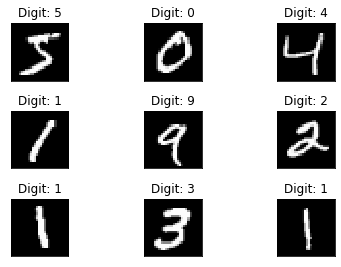

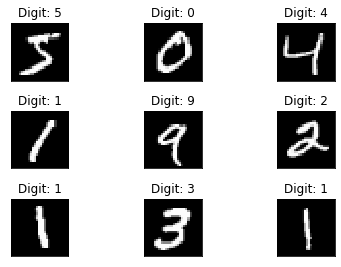

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

We will now reshape and normalize our input data. Normalizing the input data helps to speed up the training. 
Let's also reshape our inputs to a single vector vector and normalize the pixel values to lie between 0 and 1.

In [4]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [5]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


one-hot encoding using keras' numpy-related utilities

In [6]:
n_classes = 10
print("Shape before one-hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Building a linear stack of layers with the sequential model

In [7]:

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0851 - val_accuracy: 0.9815
Epoch 2/20
 - 6s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0799 - val_accuracy: 0.9834
Epoch 3/20
 - 6s - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0744 - val_accuracy: 0.9854
Epoch 4/20
 - 6s - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0855 - val_accuracy: 0.9842
Epoch 5/20
 - 7s - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0848 - val_accuracy: 0.9824
Epoch 6/20
 - 7s - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0893 - val_accuracy: 0.9811
Epoch 7/20
 - 7s - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0824 - val_accuracy: 0.9833
Epoch 8/20
 - 7s - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0873 - val_accuracy: 0.9841
Epoch 9/20
 - 7s - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0909 - val_accuracy: 0.9823
Epoch 10/20
 - 7s - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0920 - val_accuracy: 0.9840
Epoch 11/20
 - 7s -


9845  classified correctly
155  classified incorrectly


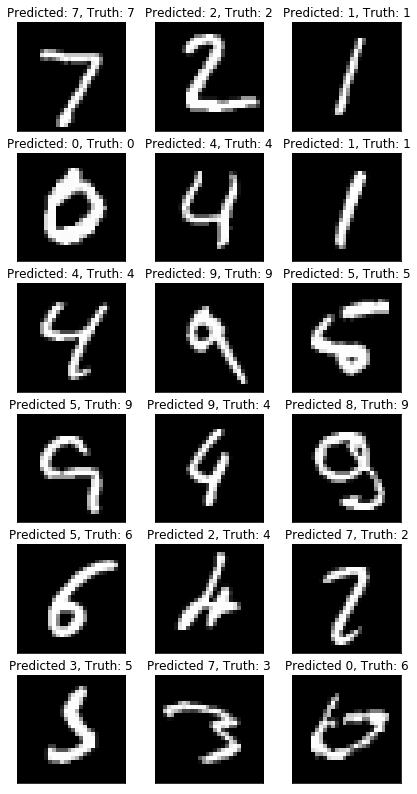

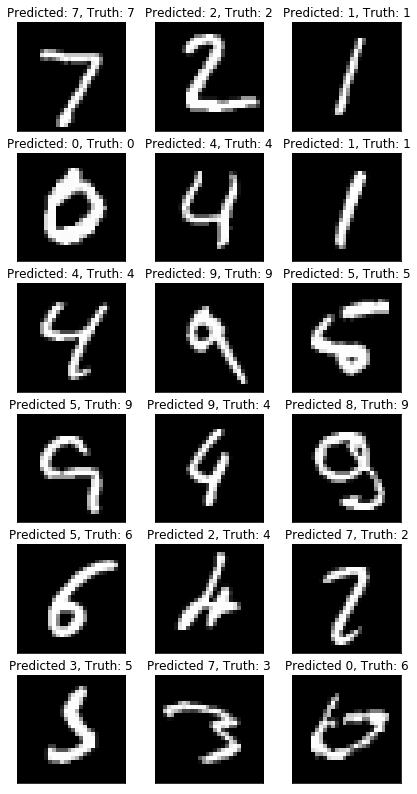

In [10]:
# load the model and create predictions on the test set
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

Visualizing output of layers of neural network using Keract

dense_1_input (1, 784) 


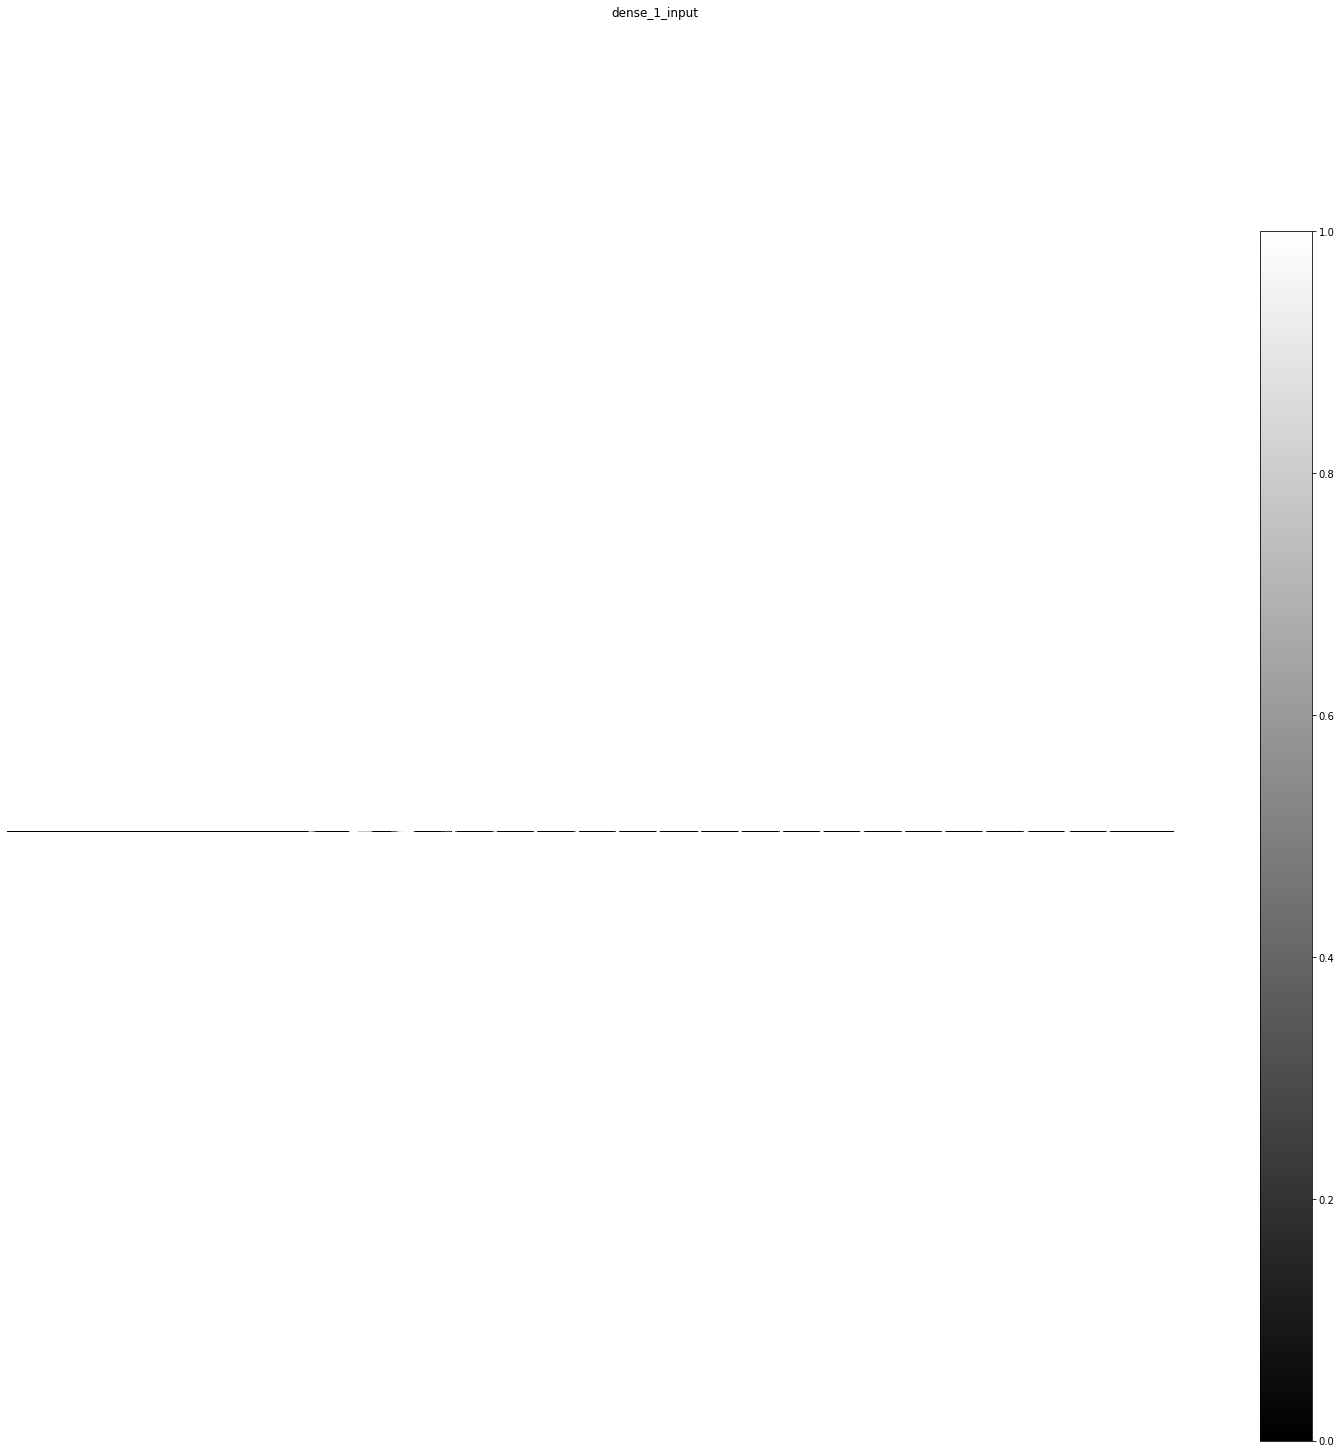

dense_1 (1, 512) 


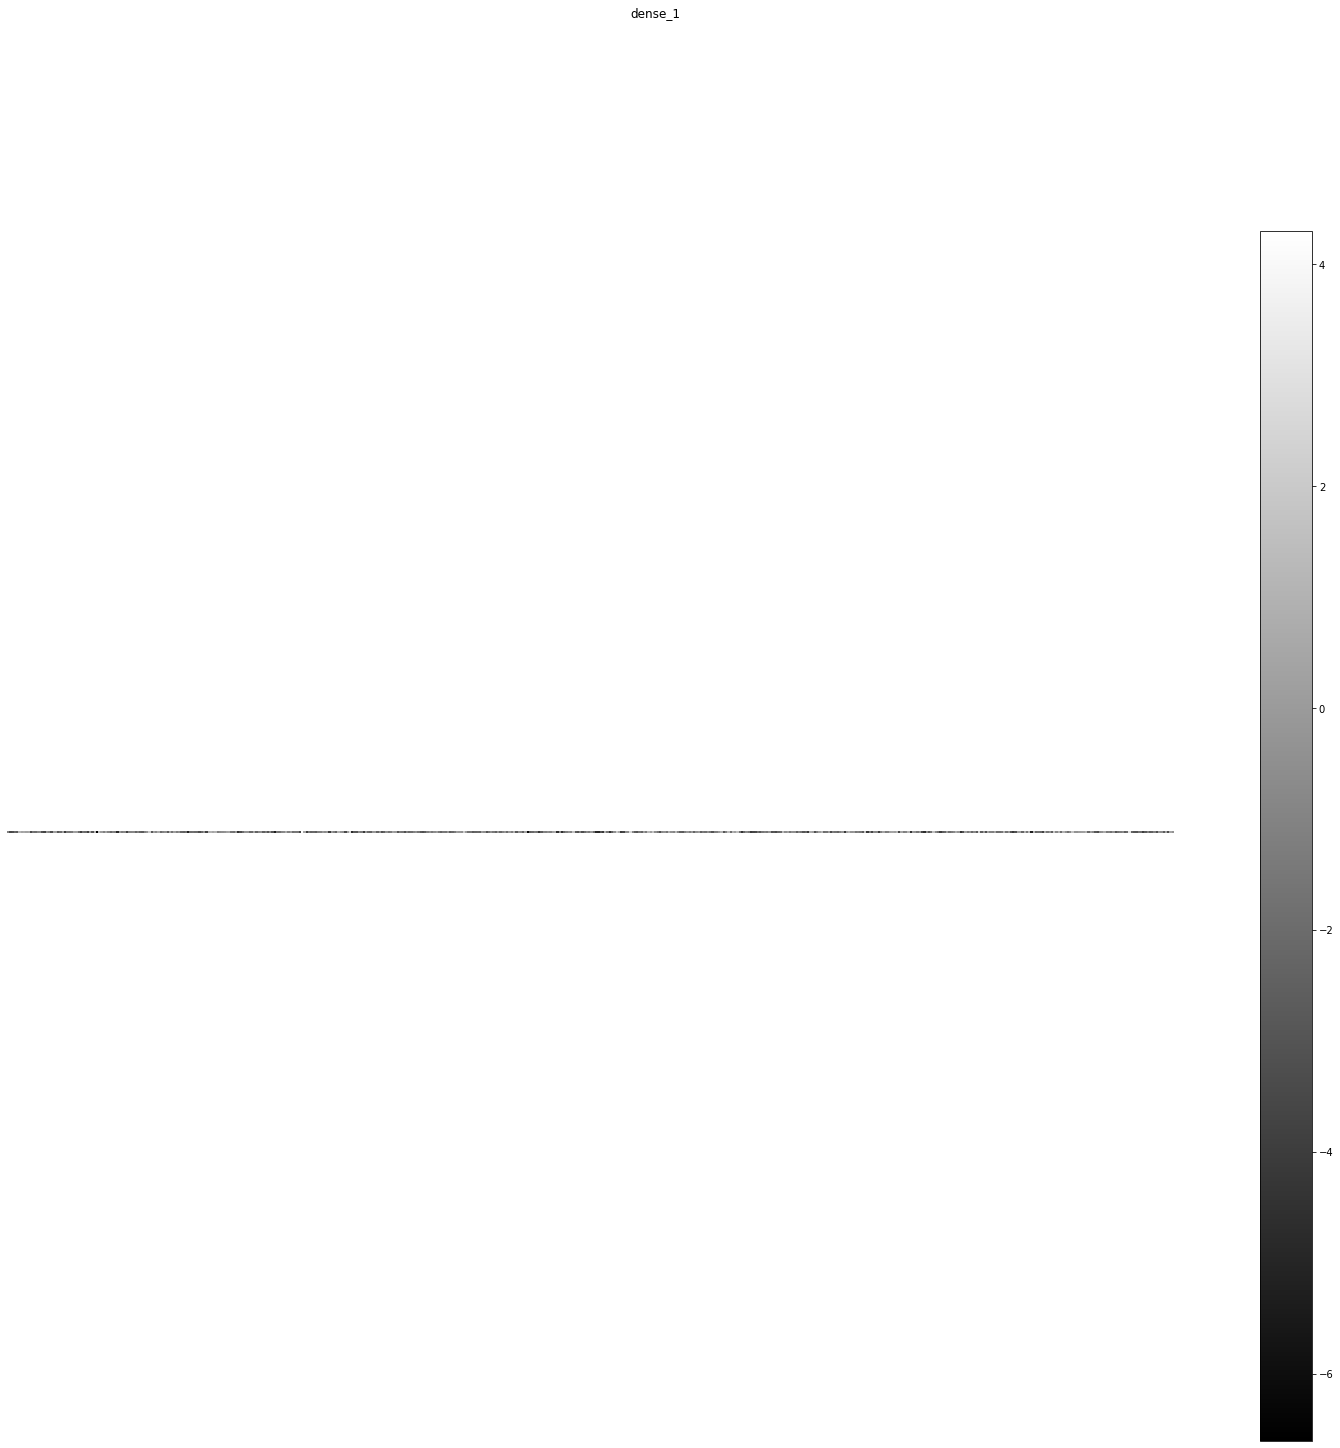

activation_1 (1, 512) 


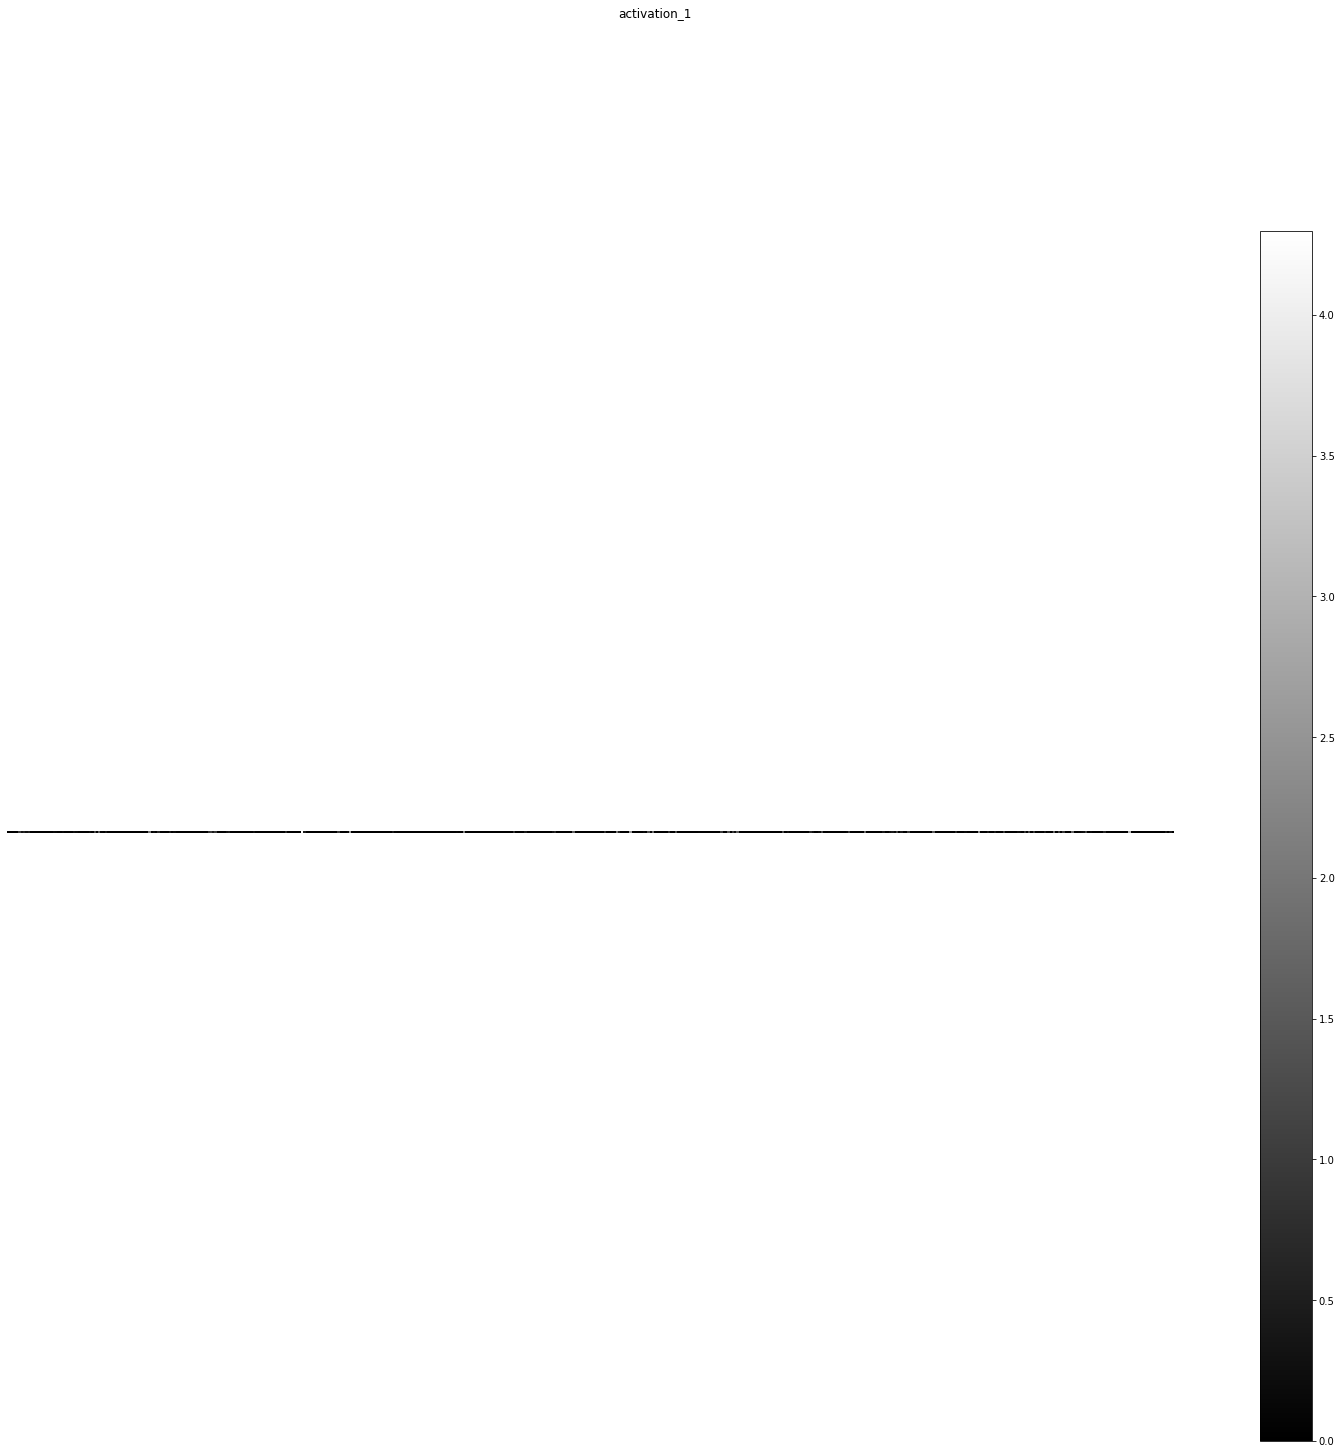

dropout_1 (1, 512) 


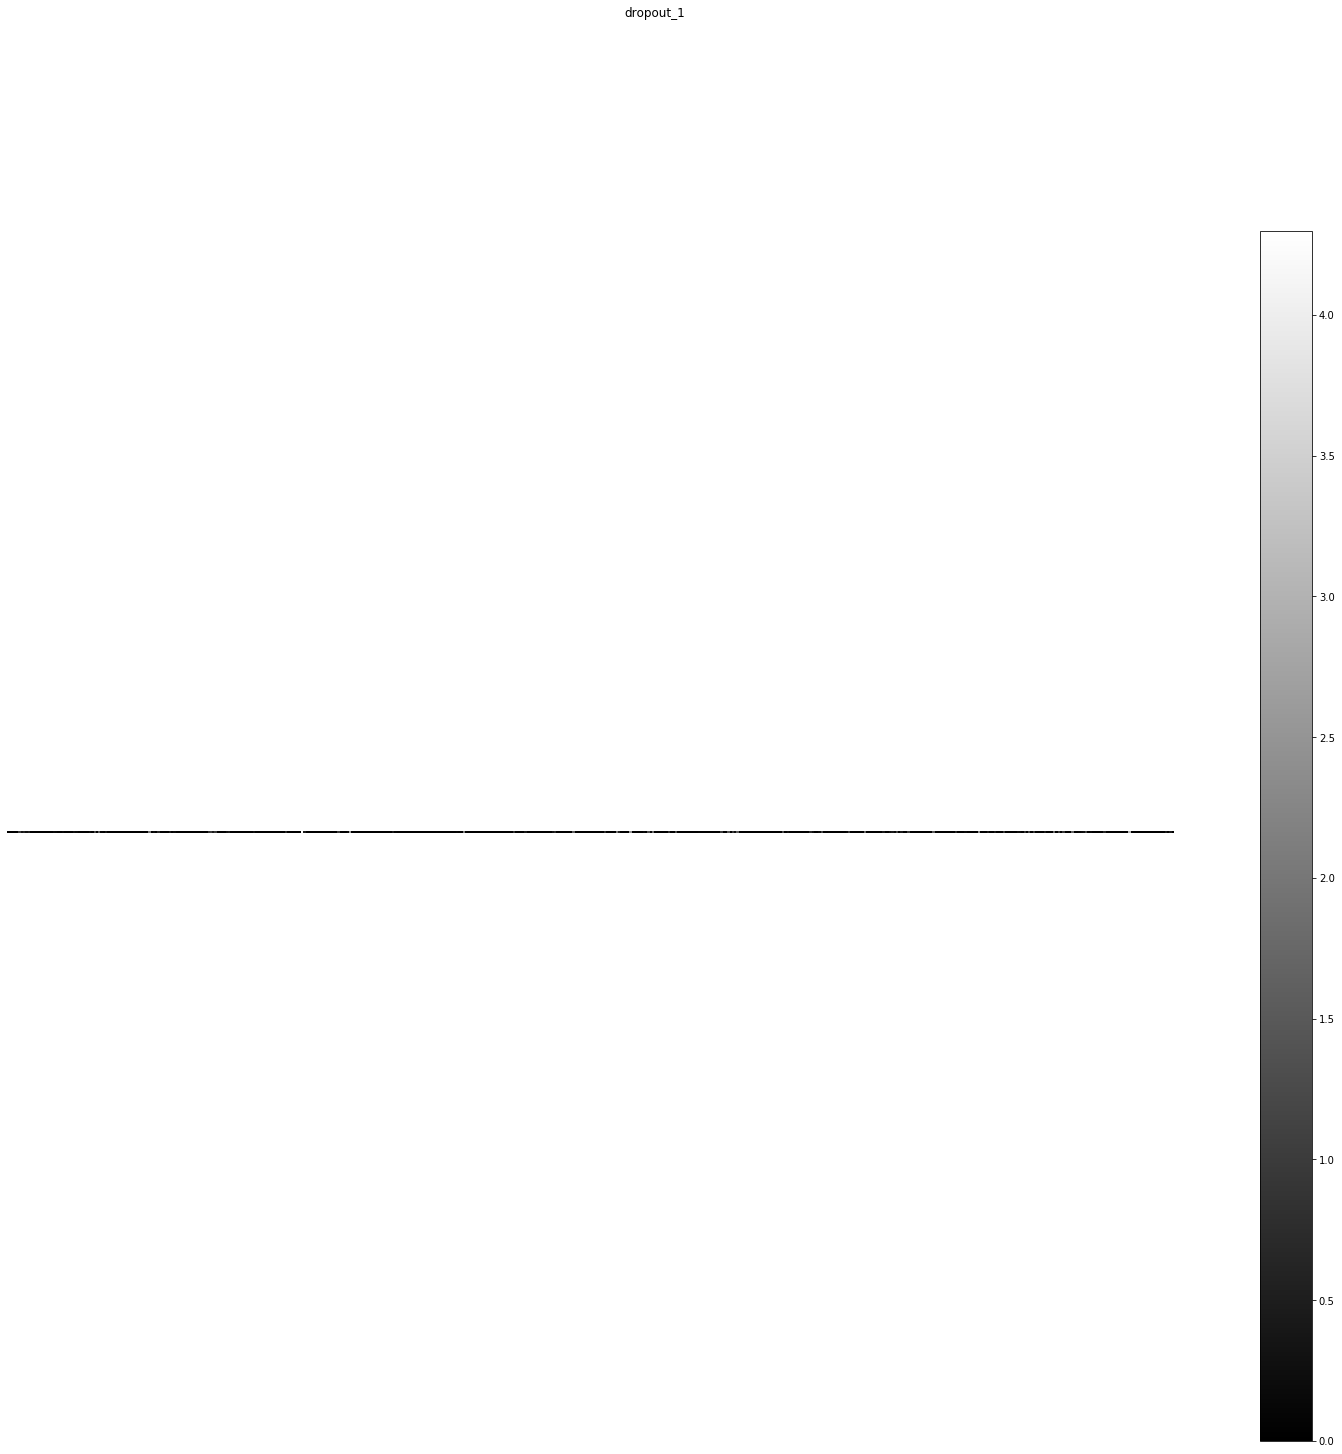

dense_2 (1, 512) 


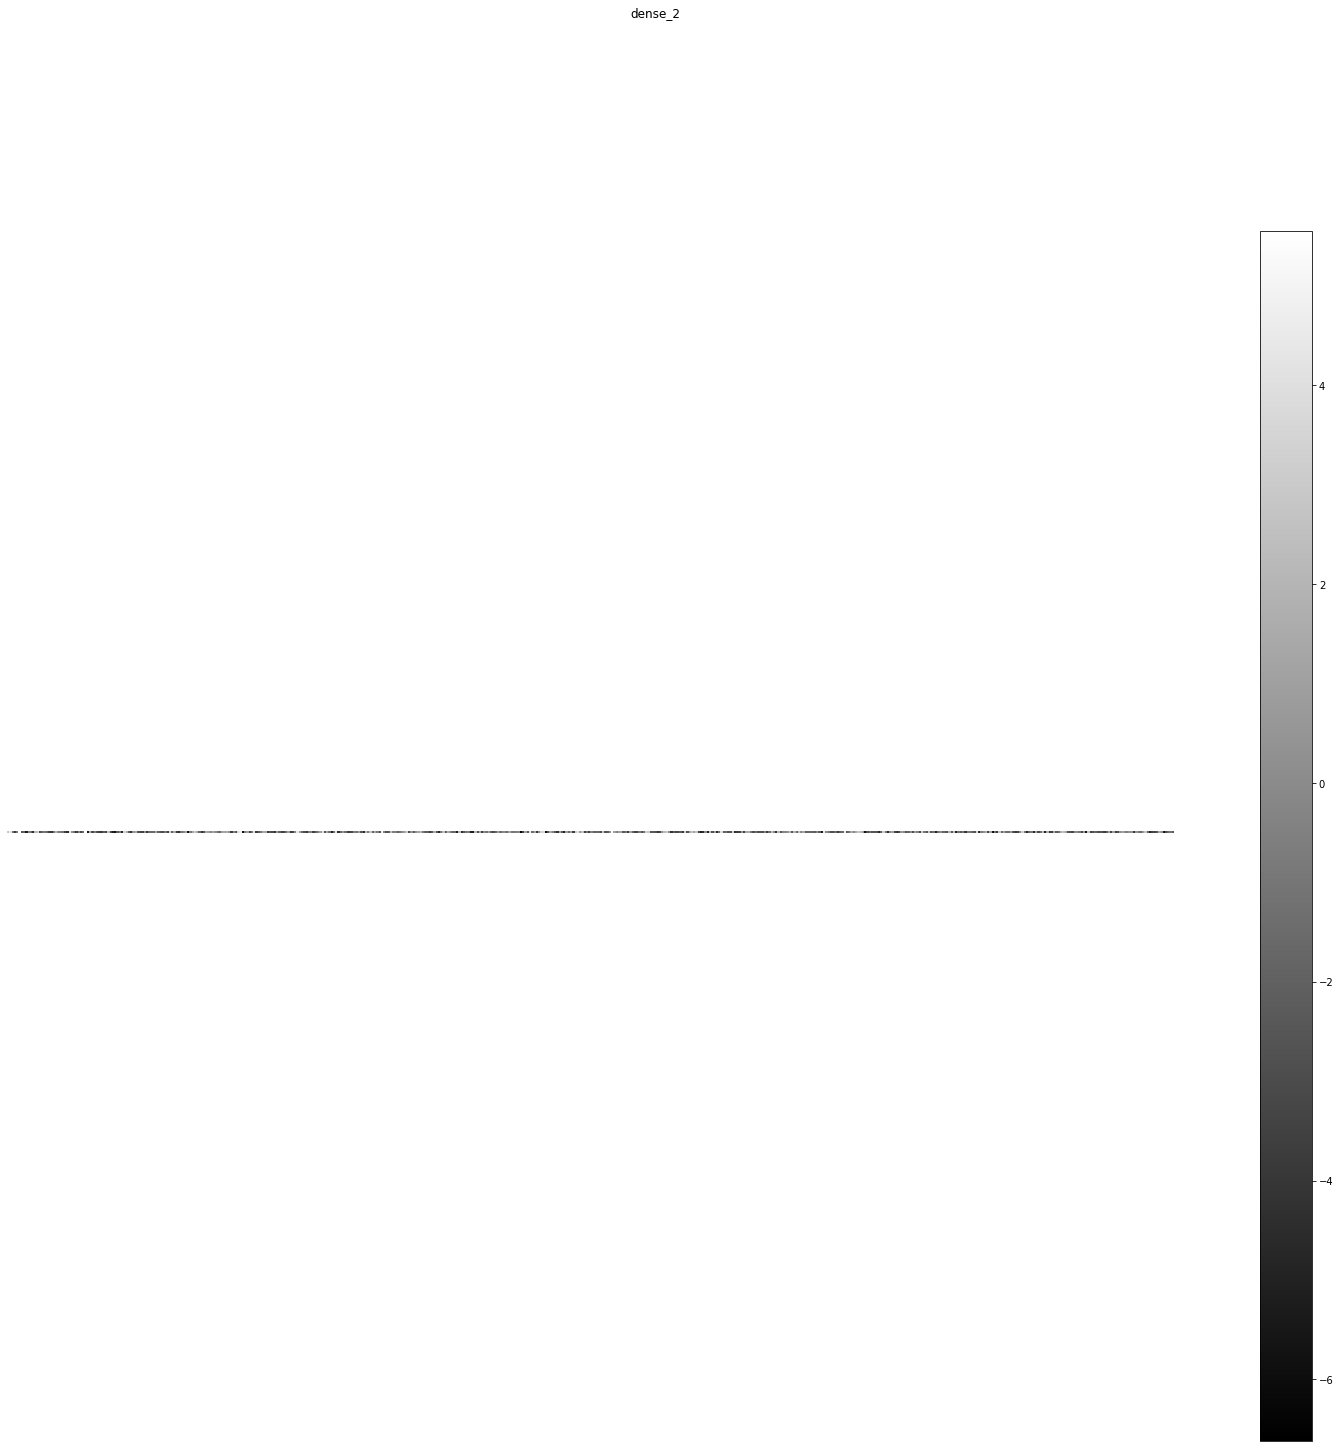

activation_2 (1, 512) 


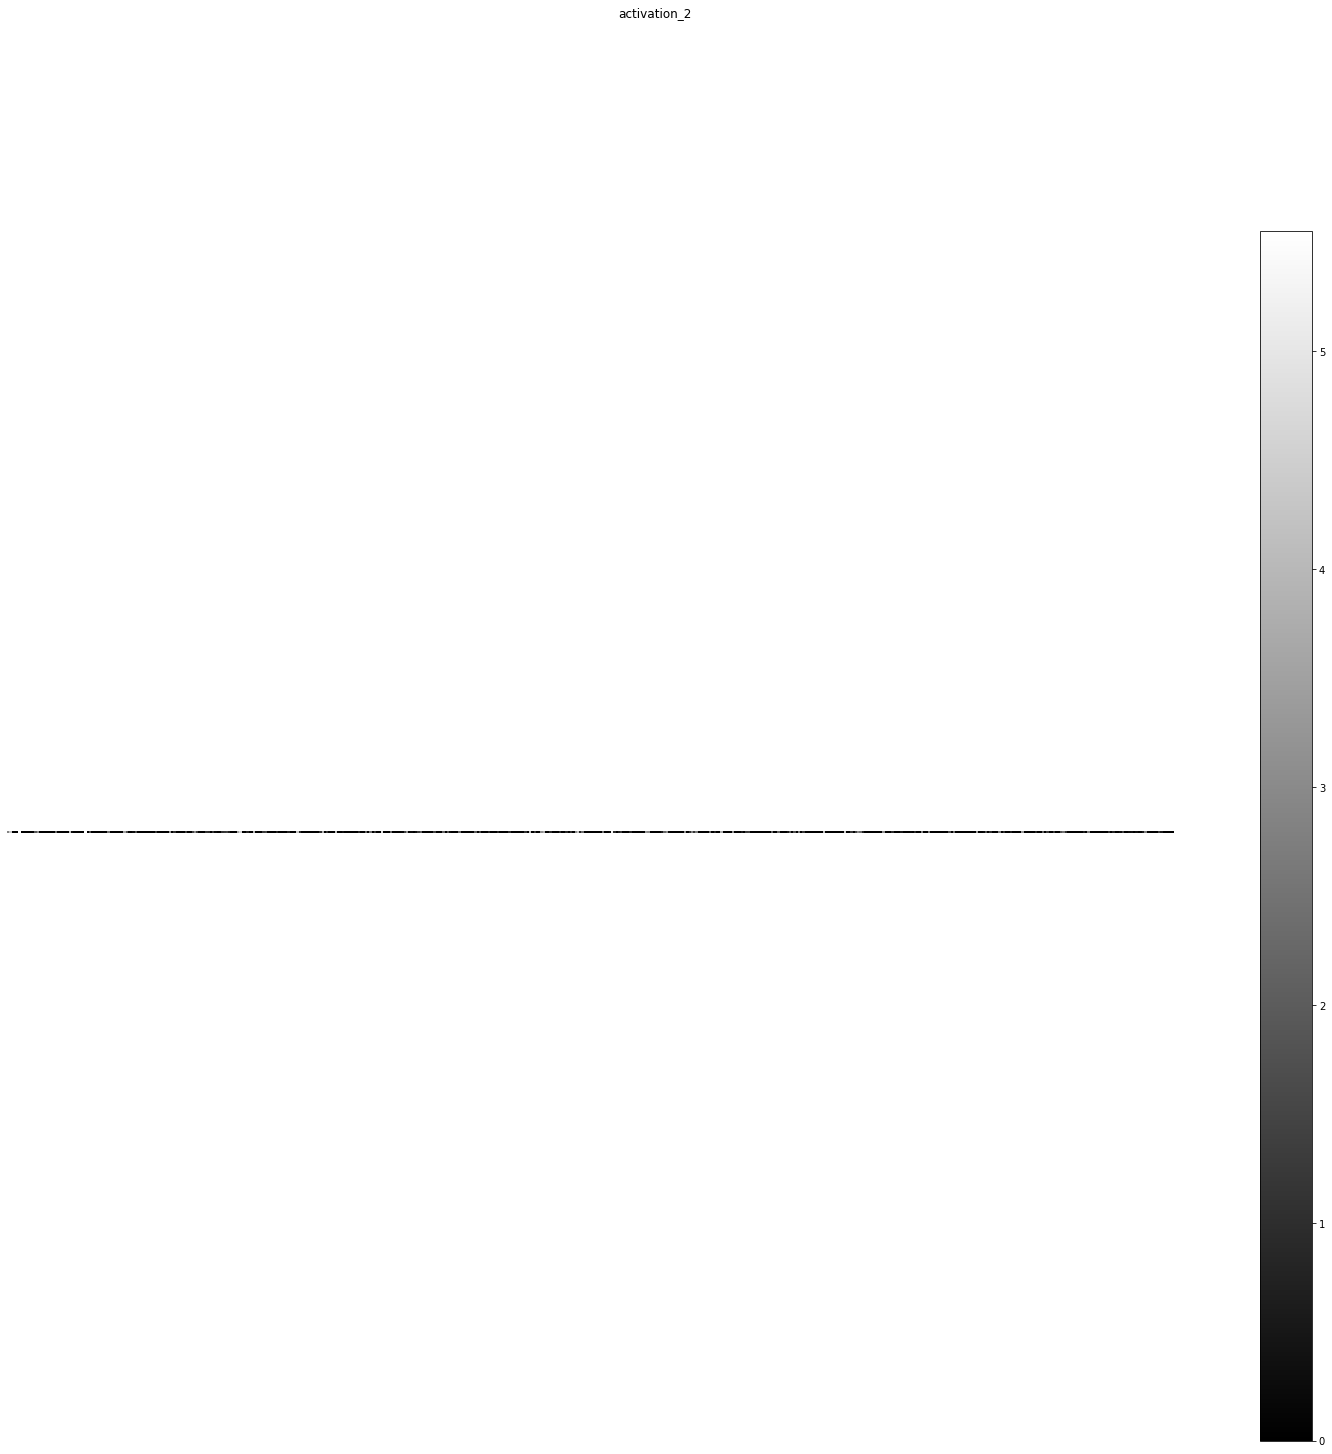

dropout_2 (1, 512) 


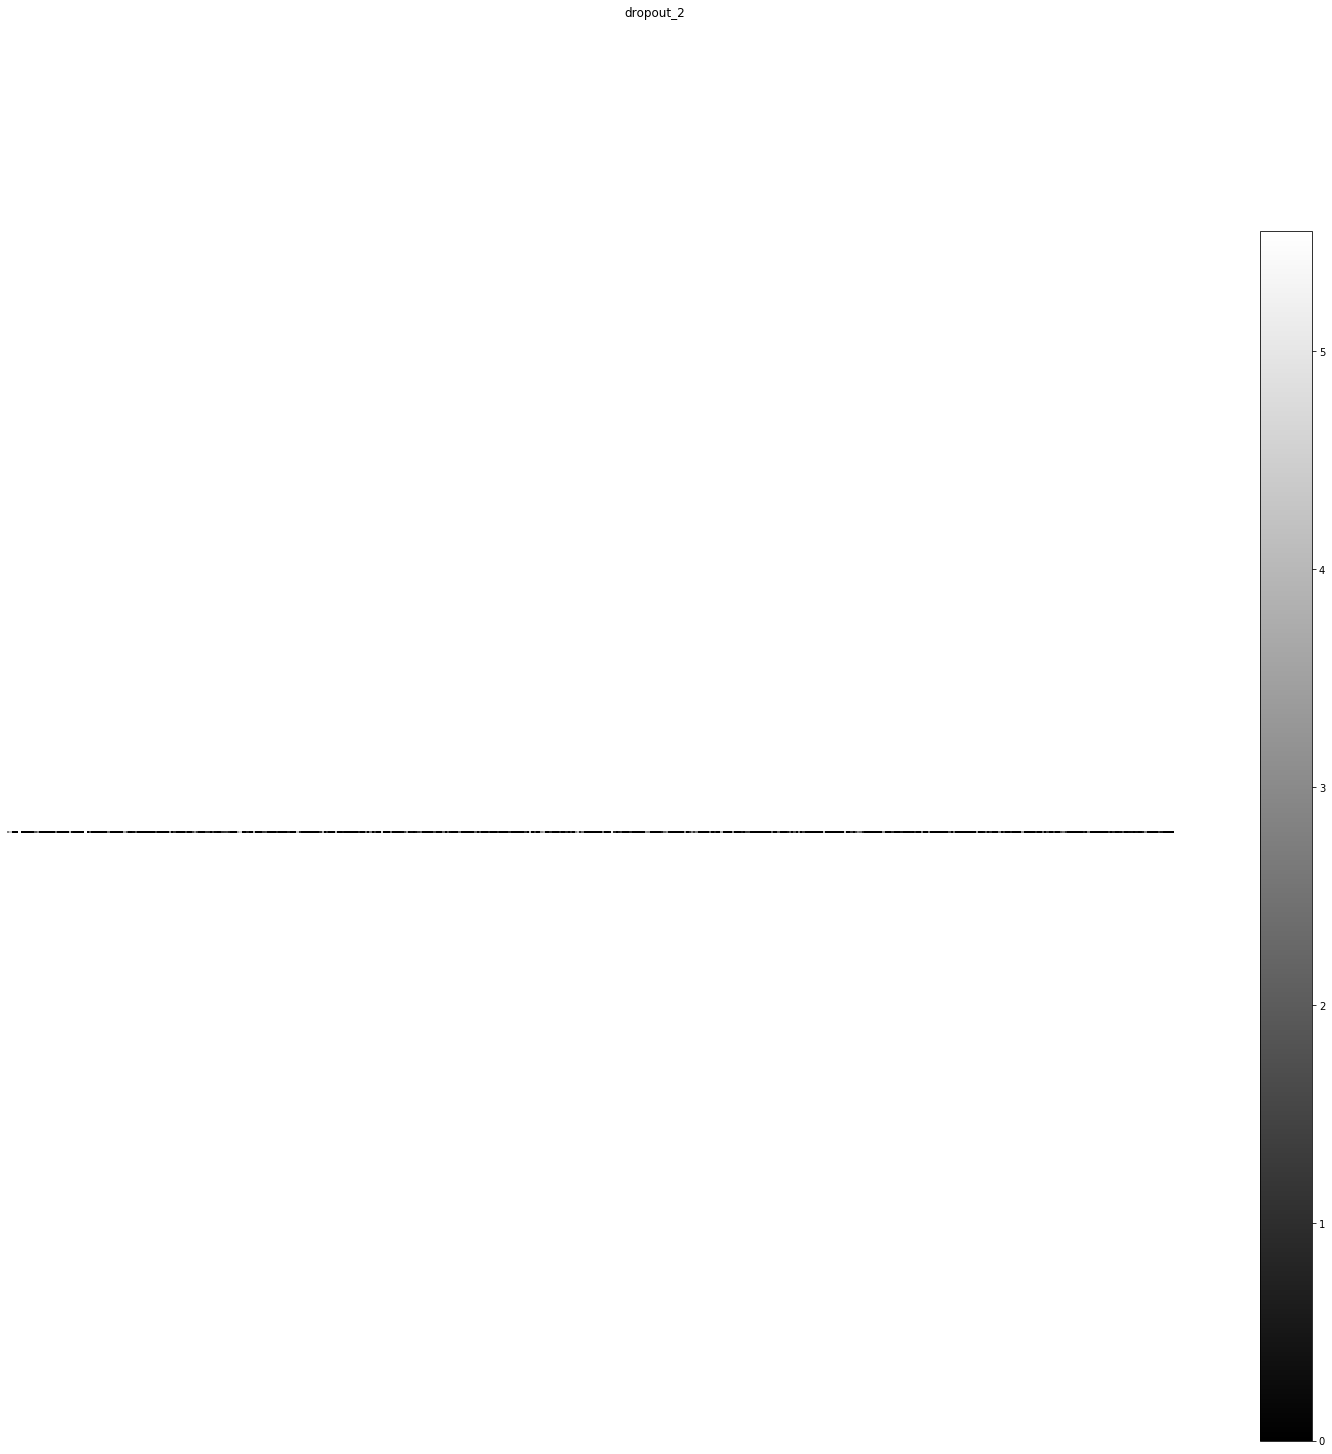

dense_3 (1, 10) 


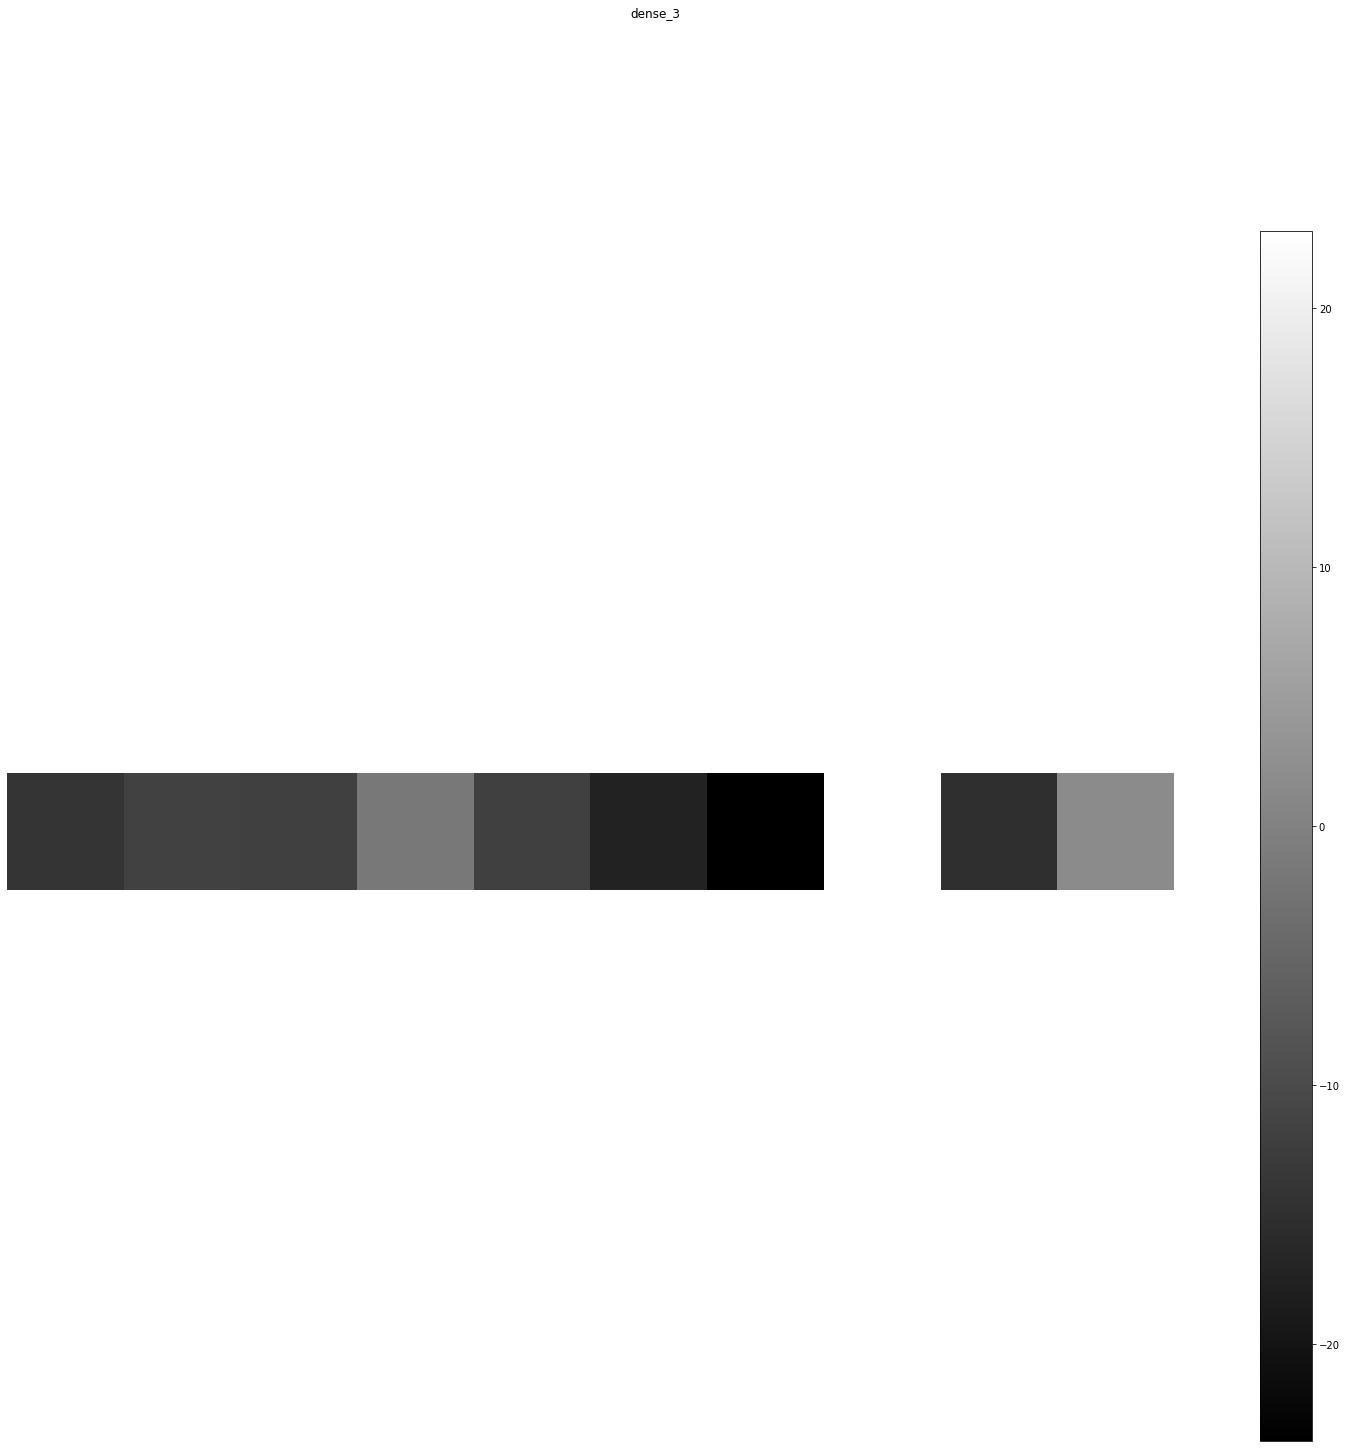

activation_3 (1, 10) 


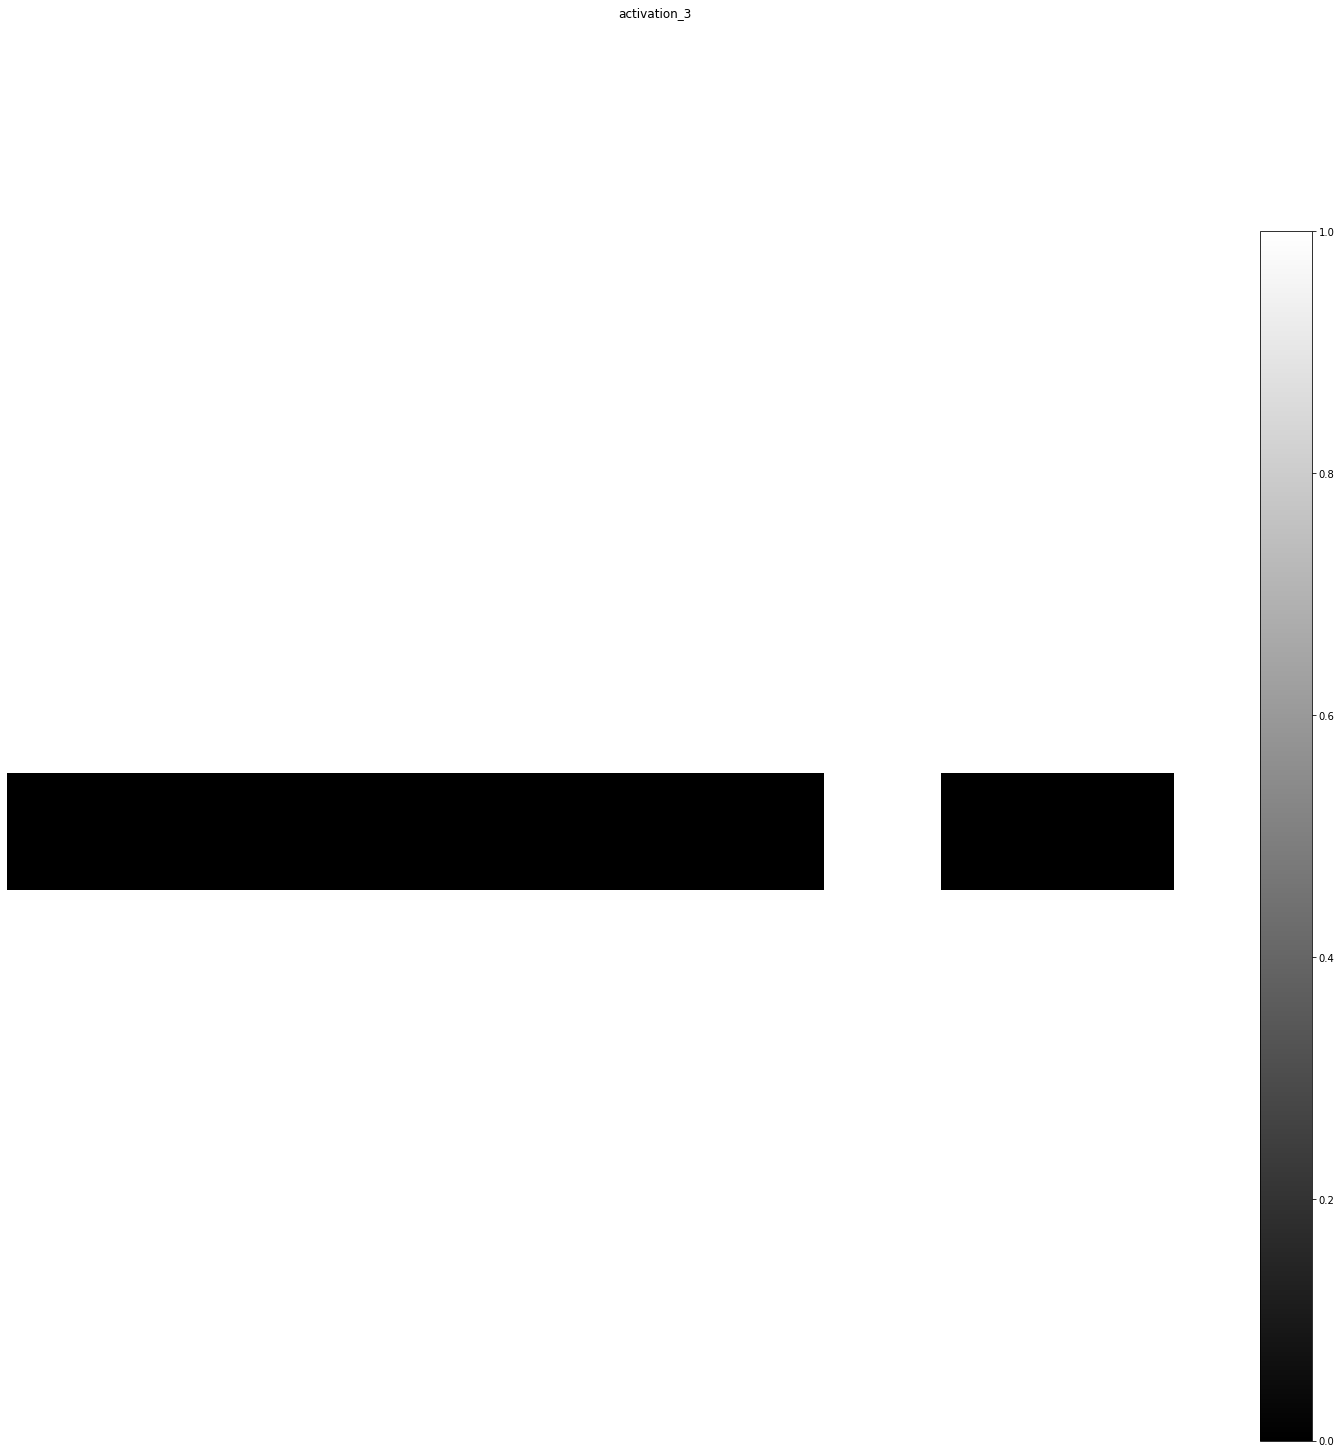

In [11]:
keract_inputs = X_test[:1]
keract_targets = y_test[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)
